This notebook contains an example of when the model is fed two features. In the training data, $y = sin(X_1)$. $X_2$ has no correlation to $y$ whatsoever, and is just random numbers. We are testing to see how the model degrades if one of the features is random.

First we import the required libraries. `numpy` is used to allow us to manipulate arrays with efficiency. `pandas` gives us access to Panda Dataframes which are the preferred way of storing our data. `matplotlib.pyplot` lets us plot graphs with our data. `twinlab` is the main library we are using. Some of the libraries are renamed using `as` for convenience. 

In [1]:
# Third-party imports
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Project imports
import twinlab as tl


         === TwinLab Client Initialisation ===
         Training : https://pdersvjxmgrkqojwyeyocqm7le0iwtkx.lambda-url.eu-west-2.on.aws/
         Server   : https://mt9w8ln59j.execute-api.eu-west-2.amazonaws.com/dev
         Group    : digilab
         User     : tim



At the top of this cell we define the name of our dataset and model.

Next, we define the training data:
- $X_1$ is an array of values between 0 and 1.
- $X_2$ creates an array of 10 random numbers between 0 and 1. 
- $y$ is $sin(X_1)$ and has no dependency on $X_2$ whatsoever. 

At the bottom of the cell we put these arrays into a Pandas dataframe with the corresponding coloumn headings.

In [2]:
dataset_id = "second_random_input.csv"
campaign_id = "second_random_input"

#Training Data
X1 = np.array([
    0.6964691855978616,
    0.28613933495037946,
    0.2268514535642031, 
    0.5513147690828912, 
    0.7194689697855631, 
    0.42310646012446096, 
    0.9807641983846155, 
    0.6848297385848633, 
    0.48093190148436094, 
    0.3921175181941505
])
X2 = np.random.rand(10)
y = np.sin(X1*2.*np.pi)

train_data = pd.DataFrame({'X1': X1, 'X2':X2, 'y': y })
print(train_data)

         X1        X2         y
0  0.696469  0.811582 -0.943968
1  0.286139  0.575744  0.974330
2  0.226851  0.030196  0.989441
3  0.551315  0.370228 -0.316863
4  0.719469  0.939824 -0.981657
5  0.423106  0.897128  0.464559
6  0.980764  0.313180 -0.120568
7  0.684830  0.237463 -0.917329
8  0.480932  0.162228  0.119522
9  0.392118  0.988860  0.627116


In this cell we set the parameters we are going to train the model on.

In [3]:
#defines parameters for our prediction
prediction_params = {
    "filename": dataset_id,
    "inputs" : ["X1", "X2"],
    "outputs": ["y"],
}

This cell creates our input values for the model to predict outputs for. 
- The $X_1$ values are 101 equally spaced numbers between 0 and 1. We convert this array to a list.
- The $X_2$ values are 101 random values between 0 and 1. They are stored in an array so we `.ravel()` them to make them a 1D list which is required for the next step.

We now create a Pandas Dataframe with the data and corresponding data.

In [4]:
input_dict = {
    "X1": np.linspace(0, 1, 101),
    "X2": np.random.rand(101)
}

prediction_inputs = pd.DataFrame(input_dict)
print(prediction_inputs)

       X1        X2
0    0.00  0.229492
1    0.01  0.650869
2    0.02  0.343574
3    0.03  0.115307
4    0.04  0.294033
..    ...       ...
96   0.96  0.912304
97   0.97  0.715072
98   0.98  0.408563
99   0.99  0.217182
100  1.00  0.857769

[101 rows x 2 columns]


We now upload the training data (the already set values of $X_1, X_2$ and $y$) to the twinLab cloud.

Whenever `verbose = true` is an argument, the function returns information about what it is doing to the user. This generates the grey text below the cells when they are run.

In [5]:
tl.upload_dataset(train_data, dataset_name=dataset_id, verbose=True)

Response: Presigned URL generated successfully

Dataframe uploaded successfully.

Uploading second_random_input.csv
Response: Dataset second_random_input.csv processed successfully



`tl.list_datasets()` lets us check if the dataset we uploaded is in the right place.
`tl.query_dataset()` lets us view statistics about the data in our dataset 

In [6]:
_ = tl.list_datasets(verbose=True)
tl.query_dataset(dataset_id)

Response: Found 5 datasets

Datasets:
['adaas', 'basic', 'basic.csv', 'second_random_input.csv', 'test.csv']


,X1,X2,y
count,10.000000,10.000000,10.000000
mean,0.544199,0.532643,-0.010542
std,0.229352,0.355556,0.771847
min,0.226851,0.030196,-0.981657
25%,0.399865,0.256392,-0.767213
50%,0.516123,0.472986,-0.000523
75%,0.693559,0.875741,0.586477
max,0.980764,0.988860,0.989441


This cell trains the model on the dataset we provided, and within the parameters we provided.

In [7]:
tl.train_campaign(prediction_params, campaign_id, verbose=True)

Response: Training second_random_input complete



This simply lists the current models on the twinlab cloud.

In [8]:
_ = tl.list_campaigns(verbose=True)

Response: Found 2 campaigns

Campaigns:
['test', 'second_random_input']


This displays information about the model we are using.

In [9]:
_ = tl.query_campaign(campaign_id, verbose=True)

Response: Query of second_random_input campaign complete

Metadata:
{'inputs': ['X1', 'X2'],
 'outputs': ['y'],
 'diagnostics': {'transformer_diagnostics': [],
                 'estimator_diagnostics': {'likelihood.noise_covar.raw_noise': [0.0015057769288144326],
                                           'likelihood.noise_covar.noise_prior.concentration': 1.100000023841858,
                                           'likelihood.noise_covar.noise_prior.rate': 0.05000000074505806,
                                           'likelihood.noise_covar.raw_noise_constraint.lower_bound': 9.999999747378752e-05,
                                           'likelihood.noise_covar.raw_noise_constraint.upper_bound': inf,
                                           'mean_module.raw_constant': 0.24628102040216063,
                                           'covar_module.raw_outputscale': 0.0855113907838414,
                                           'covar_module.base_kernel.raw_lengthscale': [[-0.8545

This step is where the model takes in the $X_1$ and $X_2$ values we gave it and based on the training data, it predicts the corresponding $y$ value. `df_mean` is the value the model predicts. `df_std` is how uncertain the model is about the `df_mean` value, where `df_mean` could be anywhere plus or minus the `df_std` value.

In [10]:
df_mean, df_std = tl.predict_campaign(prediction_inputs, campaign_id, verbose=True)

Response: Prediction from second_random_input campaign complete

Mean: 
             y
0    0.719629
1    0.723669
2    0.762204
3    0.771749
4    0.802470
..        ...
96  -0.353729
97  -0.270764
98  -0.148167
99  -0.070091
100 -0.196395

[101 rows x 1 columns] 

Std: 
             y
0    0.510951
1    0.532448
2    0.493803
3    0.463592
4    0.461479
..        ...
96   0.336044
97   0.254811
98   0.074189
99   0.079870
100  0.339676

[101 rows x 1 columns] 



Now we first plot on a graph the $X_1$ against $y$, then $X_2$ against $y$. 
- The black dots on the graph are the training data we gave it. 
- The darkest blue line in the graph is the `df_mean` value.
- The blue sections either side represent the range of uncertainty in the `df_mean` value.

On the first graph ($X_1$ against $y$), the model has become more uncertain about its predictions of $y$ because of the introduction of $X_2$
On the second graph, we can see there is no correlation between $X_2$ and $y$.

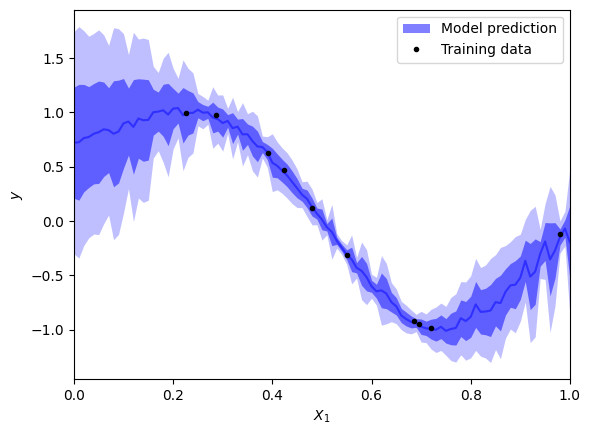

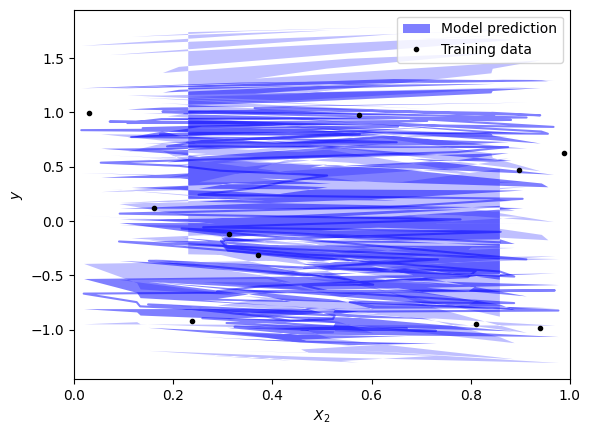

In [11]:
# Plot parameters
nsigs = [1, 2]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

for X, Xlabel in zip(["X1", "X2"], ["$X_1$", "$X_2$"]):
# Plot results
    grid = prediction_inputs[X]
    mean = df_mean["y"]
    err = df_std["y"]
    if plot_model_bands:
        label = "Model prediction"
        plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
        for isig, nsig in enumerate(nsigs):
            plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
    if plot_model_mean:
        label = "Model prediction" if not plot_model_bands else None
        plt.plot(grid, mean, color=color, alpha=alpha, label=label)
    if plot_training_data:
        plt.plot(train_data[X], train_data["y"], ".", color="black", label="Training data")
    plt.xlim((0., 1.))
    plt.xlabel(Xlabel)
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

In [12]:
# Delete campaign and dataset (if desired)
tl.delete_campaign(campaign_id, verbose=True)
tl.delete_dataset(dataset_id, verbose=True)

Response: second_random_input campaign deleted successfully

Response: second_random_input.csv dataset and summary deleted successfully

